# Multi Layer Neural Network 

problem statement :

The data given in the url  is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to predict whether client will subscribe to term deposit
    https://drive.google.com/open?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn


In [1]:
#importing necessary libraries

#importing pandas library to handel dataset
import pandas as pd
#importing numpy library for faster matrix calculations
import numpy as np
#importing job-lib
import joblib
#importing matplotlib for plotting data graphs
import matplotlib.pyplot as plt
#importing seaborn advanced plotting library
import seaborn as sns

#loading data set
bank_data = pd.read_csv("bank.csv",sep=';')
#seeing data set
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### data pre processing

In [2]:
#since y is a target variable we are giving it numerical value like 1 for yes and 0 for no
bank_data.y.replace(['yes', 'no'], [1, 0], inplace=True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [3]:
#counting number of yes and no values in y
count_y_values = bank_data['y'].value_counts()
count_y_values

0    4000
1     521
Name: y, dtype: int64

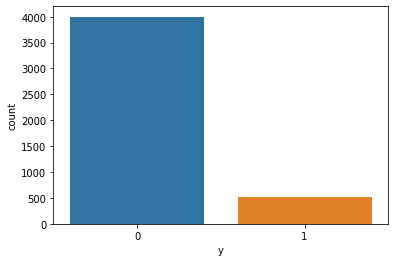

In [4]:
#plotting histogram of the y values count
sns.countplot(x='y',data=bank_data)

In [5]:
#checking dependency of target value on features
#checking mean of all columns at y=0 and y=1
bank_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [6]:
#this will show the variation of y on job(catagory wise)...like which job category have how many people subscribed 
bank_data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,0.226190


In [7]:
#checking mean of all columns at marital .. note only variation of y....
bank_data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,0.145833
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,0.099035
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,0.139632


In [8]:
#checking mean of all columns at education .. note only variation of y....
bank_data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604


In [9]:
#checking mean of all columns at default .. note only variation of y....
bank_data.groupby('default').mean()

,age,balance,day,duration,campaign,pdays,previous,y
default,,,,,,,,
no,41.194826,1450.550956,15.929584,264.355906,2.79865,40.111136,0.548481,0.115186
yes,39.723684,-208.723684,15.078947,240.881579,2.50000,19.618421,0.197368,0.118421


In [10]:
#checking mean of all columns at housing .. note only variation of y....
bank_data.groupby('housing').mean()

,age,balance,day,duration,campaign,pdays,previous,y
housing,,,,,,,,
no,43.511723,1595.277268,16.209990,259.290520,2.80632,26.402141,0.467890,0.153415
yes,39.374756,1290.309496,15.689332,267.542399,2.78390,50.013286,0.599844,0.085971


In [11]:
#checking mean of all columns at loan .. note only variation of y....
bank_data.groupby('loan').mean()

,age,balance,day,duration,campaign,pdays,previous,y
loan,,,,,,,,
no,41.220627,1513.857963,15.932376,264.512794,2.771018,41.088512,0.558486,0.124804
yes,40.890014,917.163531,15.820550,260.904486,2.918958,32.439942,0.454414,0.062229


In [12]:
#checking mean of all columns at contact .. note only variation of y....
bank_data.groupby('contact').mean()

,age,balance,day,duration,campaign,pdays,previous,y
contact,,,,,,,,
cellular,40.680594,1423.197859,16.025552,267.112569,2.750691,56.515539,0.755180,0.143646
telephone,48.418605,1806.043189,17.568106,243.355482,3.102990,47.136213,0.744186,0.146179
unknown,40.592900,1334.317221,15.298338,261.753021,2.817221,1.456193,0.031722,0.046073


In [13]:
#checking meaen of all columns at month .. note only variation of y....
bank_data.groupby('month').mean()

,age,balance,day,duration,campaign,pdays,previous,y
month,,,,,,,,
apr,39.604096,1658.061433,17.474403,294.354949,1.866894,93.843003,0.969283,0.191126
aug,42.998420,1454.559242,16.480253,243.742496,3.932070,12.842022,0.243286,0.124803
dec,42.200000,3567.150000,16.000000,416.900000,1.850000,127.900000,1.950000,0.450000
feb,41.518018,1319.040541,6.549550,255.698198,2.252252,67.743243,1.031532,0.171171
jan,41.567568,976.364865,27.743243,269.540541,1.797297,75.905405,1.114865,0.108108
jul,41.399433,789.467422,18.311615,271.205382,3.694051,7.500000,0.090652,0.086402
jun,42.175141,1884.792844,10.998117,252.425612,3.171375,9.491525,0.150659,0.103578
mar,47.020408,2049.530612,13.979592,198.897959,2.673469,48.061224,0.857143,0.428571
may,39.276824,1104.173820,15.557940,267.316166,2.439199,53.265379,0.612303,0.066524


In [14]:
#checking mean of all columns at age .. note only variation of y....
bank_data.groupby('poutcome').mean()

,age,balance,day,duration,campaign,pdays,previous,y
poutcome,,,,,,,,
failure,41.555102,1644.646939,14.395918,254.383673,1.955102,243.167347,2.851020,0.128571
other,39.873096,1424.472081,15.101523,273.832487,2.350254,219.385787,3.385787,0.192893
success,44.170543,1949.410853,14.581395,338.635659,1.736434,163.713178,3.015504,0.643411
unknown,41.083671,1374.862078,16.205938,262.103104,2.964912,-1.000000,0.000000,0.090958


In [15]:
#now we chacked variation of y with all catagorical and continous data columns 
# removing unnecessary columns
bank_data.drop(['age','default', 'balance', 'contact', 'day', 'month','campaign'], axis=1, inplace=True)
bank_data.head()

,job,marital,education,housing,loan,duration,pdays,previous,poutcome,y
0,unemployed,married,primary,no,no,79,-1,0,unknown,0
1,services,married,secondary,yes,yes,220,339,4,failure,0
2,management,single,tertiary,yes,no,185,330,1,failure,0
3,management,married,tertiary,yes,yes,199,-1,0,unknown,0
4,blue-collar,married,secondary,yes,no,226,-1,0,unknown,0


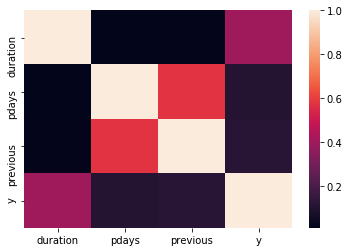

In [16]:
#plotting heat map for better co-relation view
sns.heatmap(bank_data.corr())

In [17]:
# converted categorical data into 0 & 1
# if only 2 categories then 0 & 1  
# categories > 2  each categories will be assigned new column
# one hot encoding
def one_hot_encoding(data):
    categorical_col = [col for col in data.columns if data[col].dtype == 'O']
    
    for col in categorical_col:
        # sorting ccatories of the column
        categories = sorted(data[col].unique())
        if len(categories) == 2:
            code = 0
            for category in categories:
                data.loc[data[col] == category, col] = code
                code += 1

    categorical_col = [col for col in data.columns if data[col].dtype == 'O']

    for col in categorical_col:
        categories = sorted(data[col].unique())
        for category in categories:
            data[category] = np.zeros(len(data))

    for col in categorical_col:
        categories = sorted(data[col].unique())
        for category in categories:
            data.loc[data[col] == category, category] = 1

    data.drop(categorical_col, axis=1, inplace=True)
    return data

bank_data = one_hot_encoding(bank_data)

In [18]:
#looking at data after making catagorical to numerical values
bank_data.head(10)

,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
0,0,0,79,-1,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,220,339,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,185,330,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,1,199,-1,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,226,-1,0,0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0,0,141,176,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6,1,0,341,330,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,1,0,151,-1,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1,0,57,-1,0,0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1,1,313,147,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#making those columns values rescaling since values are distributed over a large range
# scaling all columns in range 0-1 
def min_max_normalisation(data):
    for col in data.columns:
        minimum = data[col].min()
        maximum = data[col].max()
        data[col] = (data[col] - minimum)/(maximum - minimum)
    
    return data
#looking at data after rescaling

bank_data = min_max_normalisation(bank_data)
bank_data.head()

,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
0,0.0,0.0,0.024826,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.071500,0.389908,0.16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.059914,0.379587,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.064548,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.073486,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Splitting into train and test data sets

In [20]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set

# selecting random 0.7 fraction of dataset as train set
train = bank_data.sample(frac=0.7, random_state=3)   

# chossing different random state will give different random rows
# selecting remaining i.e. 30% as test set
test = bank_data.drop(train.index)  

#printing train data set shape and it's head values
print("shape of train data : ",train.shape)
train.head()

shape of train data :  (3165, 27)


,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
3542,1.0,0.0,0.031447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2687,0.0,0.0,0.023833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2053,1.0,0.0,0.006289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3966,0.0,0.0,0.085071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1602,1.0,0.0,0.065872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
#printing test data set shape and it's head values
print("shape of test data : ",test.shape)
test.head()

shape of test data :  (1356, 27)


,housing,loan,duration,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,unknown,divorced,married,single,primary,secondary,tertiary,failure,other,success
1,1.0,1.0,0.071500,0.389908,0.16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.048659,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.017544,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,0.0,0.085071,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
14,1.0,1.0,0.028136,0.277523,0.04,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
#defining a method to seperate xtrain,xtest,ytrain,ytest data since there are large number of columns
def split_train_test_x_y(data):   
    #seperating x values
    y_values = np.array(data['y'])
    #seperating y values
    x_values = np.ones((1,len(data)))
    
    for col in data.columns:
        if col != 'y':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)

    return x_values, y_values

#obtaining x-train,x-test,y-train,y-test values by calling above function
train_x_values, train_y_values = split_train_test_x_y(train)
test_x_values, test_y_values = split_train_test_x_y(test)

In [23]:
# just printing out the shapes of train and test data set
print(train_x_values.shape)
print(train_y_values.shape)
print(test_x_values.shape)
print(test_y_values.shape)

(27, 3165)
(3165,)
(27, 1356)
(1356,)


# making model

In [24]:
# this function takes an array and returns sigmoid of that array
def sigmoid_function(array):
    return 1/(1+np.exp((-array)))

In [25]:
#this function return the cost function 
def cost_function(a,y_values):
    return (-(y_values * np.log(a) + (1 - y_values) * np.log(1 - a))).mean()

In [26]:
#this is our main function which is training our algorithm
#and will return the cost function variation and learned weights
def training_model(x_values, y_values):
    # number of data in each feature
    total        = len(train)
    
    #number of iterations we are going to perform
    iterations   = 10000
    
    #this is our learning rate by which data set is going to learn
    alpha        =  0.1
    
    # a list to store cost function after each iteration
    costs        = []
    # weights for input to first layer   # here we have 4 neurons in first layer 
    weight_one   = np.random.rand(4, len(train_x_values)) * 0.01   

    # taking random weights for input to final/output layer
    weight_two   = np.random.rand(4)               
    bias_two     = np.random.rand(4,1)
    weight_three = np.random.rand(4)
    bias_three   = np.random.rand(1)
    
    #looping 
    for _ in range(iterations):
        ##              forward.......propagating                 ##
        # creating array like multiple linear regression for first layer neurons
        z_one           = weight_one.dot(x_values) 

        # creating neurons in first layer
        a_one           = sigmoid_function(z_one) 
        
        # creating array like multiple linear regression for  layer
        z_two           = weight_two.dot(a_one) + bias_two 

        # applying sigmoid function as activation function for neurons in second layer
        a_two           = sigmoid_function(z_two)
        
        # creating array like multiple linear regression for output/final layer
        z_three         = weight_three.dot(a_two) + bias_three
        
        # implementing sigmoid function find probablity of default category
        a_three         = sigmoid_function(z_three)
        
        # calculating cost at each iteration
        costs.append(cost_function(a_three,y_values))
        

        ##        backward..............propagating       ##
        # defining derivatives for 
        #error in third layer
        delta_Z3        = a_three - train_y_values
        
        # error in weights of third layer
        delta_W3        = delta_Z3.dot(a_two.T)/total 
        
        #error in bias of third layer     
        delta_bias_3    = delta_Z3.sum()/total 
        
        #error in second layer
        delta_Z2        = weight_three.dot(delta_Z3 * a_two * (1 - a_two))                     #  derivative of the sigmoid function

        # error in weights of second layer
        delta_W2        = (delta_Z2.dot(a_one.T))/ total
        
        #error in bias of second layer
        delta_bias_2    = delta_Z2.sum()/total

        #error in first layer
        delta_Z1        = weight_two.dot(delta_Z2 * a_one * (1 - a_one))           # element wise product (*)

        # error in weights of first layer
        delta_W1        = (delta_Z1.dot(x_values.T))/total  
        
        #adjusting weights and bias elements in each iteration
        weight_one      = weight_one    - alpha * delta_W1
        weight_two      = weight_two    - alpha * delta_W2
        weight_three    = weight_three  - alpha * delta_W3
        bias_two        = bias_two      - alpha * delta_bias_2
        bias_three      = bias_three    - alpha * delta_bias_3
        
    return weight_one ,weight_two, weight_three, bias_two, bias_three, costs,iterations

In [27]:
#obataining weights and bias after training model
weight_one, weight_two, weight_three, bias_two, bias_three,costs,iterations = training_model(train_x_values, train_y_values)

In [28]:
#exporting weights into pkl file
joblib.dump(weight_one,'01_weight_one')
joblib.dump(weight_two,'01_weight_two')
joblib.dump(weight_three,'01_weight_three')
joblib.dump(bias_two,'01_bias_two')
joblib.dump(bias_three,'01_bias_three')

['01_bias_three']

##### plotting graph of cost function v/s number of iterations 

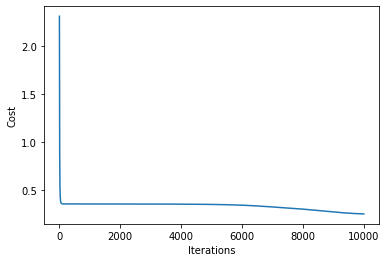

In [29]:
plt.plot(np.arange(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [30]:
# defining function to predict the output based on adjusted weights with given data
def predict_output(x_values):
   # creating array like multiple linear regression for first layer neurons
    z_one = weight_one.dot(x_values) 

    # creating neurons in first layer
    a_one = sigmoid_function(z_one) 

    # creating array like multiple linear regression for output/final layer
    z_two = weight_two.dot(a_one) + bias_two

    # applying sigmoid function as activation function for neurons in second layer
    a_two = sigmoid_function(z_two)
        
    z_three = weight_three.dot(a_two) + bias_three
        
    # implementing sigmoid function find probablity of default category
    a_three = sigmoid_function(z_three)
    
    return a_three

#### computing accurary of model

In [31]:
#obtaining predicted values of train and test data sets seperately
train_predicted_values = predict_output(train_x_values)
test_predicted_values = predict_output(test_x_values)

In [32]:
# categorising predicted values of logistic regression
def compare_outputs(y_values):
    return np.where(y_values >= 0.5, 1, 0)

In [33]:
# comparing the predicted and actual outputs abtained...
train_predicted_values = compare_outputs(train_predicted_values)
test_predicted_values  = compare_outputs(test_predicted_values)

In [34]:
# defining a function to check accuracy
def accuracy(predicted_values, actual_values):
    return (predicted_values == actual_values).mean()*100

In [35]:
# obatainig the accuracy of train set and printing its value
train_accuracy_percent = accuracy(train_predicted_values, train_y_values)
train_accuracy_percent

90.04739336492891

In [36]:
# obatainig the accuracy of test set and printing its value
test_accuracy_percent = accuracy(test_predicted_values, test_y_values)
test_accuracy_percent

88.86430678466077